<a href="https://colab.research.google.com/github/lilylily1250/portfolio/blob/main/%E6%B0%91%E6%B3%8A%E3%82%B5%E3%83%BC%E3%83%93%E3%82%B9%E3%81%AE%E5%AE%BF%E6%B3%8A%E4%BE%A1%E6%A0%BC%E4%BA%88%E6%B8%AC%EF%BC%88portfolio%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# はじめに

近年、個人物件を貸し出す民泊サービスが流行している。民泊サービスであるAirbnbの掲載物件データを使用して、宿泊価格を予測するモデルを構築した。

# 実行環境

パソコン：Windows 10 Home

開発環境：Google Coraboratory

言語：Python

ライブラリ：Matplotlib、pandas、numpy、seaborn

# 分析の流れ

1. ライブラリのインポート
2. データの確認
3. データの前処理
4. モデル構築と学習
5. モデル評価
6. 評価用データで予測、評価
7. ハイパーパラメータチューニング
8. 課題
7. まとめ









## １．ライブラリのインポート

In [ ]:
# ライブラリをインポート
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# matplotlibを使ってグラフを描く際に、フォントを日本語に対応させるためにjapanize-matplotlibというライブラリをインストール
!pip install japanize_matplotlib

In [ ]:
# ライブラリをインポート
import japanize_matplotlib

## ２．データの確認

In [ ]:
# pandasライブラリを使ってCSVファイルを読み込む
df = pd.read_csv('/content/train.csv')

In [ ]:
# 先頭5行を表示
df.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [ ]:
# 日本語の列名にする
# 最初の5行を表示
feature_names_JPN = ['id','収容可能人数','アメニティ','風呂数','ベッドの種類','ベッドルーム数','ベッド数','キャンセルポリシー','都市','クリーニング料金を含むか','説明','最初のレビュー日','ホストの写真があるかどうか','ホストの身元確認が取れているか','ホストの返信率','ホストの登録日','即時予約可能か','最後のレビュー日','緯度','経度','物件名','近隣情報','レビュー数','物件の種類','レビュースコア','部屋の種類','サムネイル画像リンク','郵便番号','宿泊価格']
df.columns = feature_names_JPN
df.head()

,id,収容可能人数,アメニティ,風呂数,ベッドの種類,ベッドルーム数,ベッド数,キャンセルポリシー,都市,クリーニング料金を含むか,...,経度,物件名,近隣情報,レビュー数,物件の種類,レビュースコア,部屋の種類,サムネイル画像リンク,郵便番号,宿泊価格
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [ ]:
# データフレームのサイズ（配列の各次元の大きさ）をタプルで取得
df.shape

(55583, 29)

55583行
29列
のデータフレームであることが確認できた。

In [ ]:
#　欠損値やデータタイプの確認
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               55583 non-null  int64  
 1   収容可能人数           55583 non-null  int64  
 2   アメニティ            55583 non-null  object 
 3   風呂数              55436 non-null  float64
 4   ベッドの種類           55583 non-null  object 
 5   ベッドルーム数          55512 non-null  float64
 6   ベッド数             55487 non-null  float64
 7   キャンセルポリシー        55583 non-null  object 
 8   都市               55583 non-null  object 
 9   クリーニング料金を含むか     55583 non-null  object 
 10  説明               55583 non-null  object 
 11  最初のレビュー日         43675 non-null  object 
 12  ホストの写真があるかどうか    55435 non-null  object 
 13  ホストの身元確認が取れているか  55435 non-null  object 
 14  ホストの返信率          41879 non-null  object 
 15  ホストの登録日          55435 non-null  object 
 16  即時予約可能か          55583 non-null  object 
 17  最後のレビュー日    


*   欠損値のあるデータフレームであることを確認

*   データ型はint（整数）、float（小数）、object（文字列）があることを確認


In [ ]:
# 各要素が欠損値かどうかを確認
df.isnull()

,id,収容可能人数,アメニティ,風呂数,ベッドの種類,ベッドルーム数,ベッド数,キャンセルポリシー,都市,クリーニング料金を含むか,...,経度,物件名,近隣情報,レビュー数,物件の種類,レビュースコア,部屋の種類,サムネイル画像リンク,郵便番号,宿泊価格
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55579,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
55580,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
55581,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# 列ごとの欠損値の数を確認
df.isnull().sum()

,0
id,0
収容可能人数,0
アメニティ,0
風呂数,147
ベッドの種類,0
ベッドルーム数,71
ベッド数,96
キャンセルポリシー,0
都市,0
クリーニング料金を含むか,0


In [ ]:
# 欠損値がある列数の確認
print(f'欠損値がある列の数: {(df.isnull().sum() > 0).sum()}')

欠損値がある列の数: 13




*   欠損値がある列が、１３列あると確認
*   最初のレビュー日、ホストの返信率、最後のレビュー日、レビュースコアは全体の約５分の１の欠損値があることを確認
*   近隣情報、サムネイル画像リンクは全体の約１０分の１の欠損値があることを確認





In [ ]:
# 数値データの基本統計量を確認
df.describe()

,id,収容可能人数,風呂数,ベッドルーム数,ベッド数,緯度,経度,レビュー数,レビュースコア,宿泊価格
count,55583.000000,55583.000000,55436.000000,55512.000000,55487.000000,55583.000000,55583.000000,55583.000000,43027.000000,55583.000000
mean,27791.000000,3.152906,1.236426,1.265312,1.711770,38.450812,-92.342406,20.937283,94.077928,160.163647
std,16045.574343,2.153001,0.583074,0.849319,1.257822,3.080869,21.687844,37.951889,7.802154,168.087140
min,0.000000,1.000000,0.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,1.000000
25%,13895.500000,2.000000,1.000000,1.000000,1.000000,34.128205,-118.341876,1.000000,92.000000,74.000000
50%,27791.000000,2.000000,1.000000,1.000000,1.000000,40.663312,-76.995602,6.000000,96.000000,111.000000
75%,41686.500000,4.000000,1.000000,1.000000,2.000000,40.746146,-73.954703,23.000000,100.000000,185.000000
max,55582.000000,16.000000,8.000000,10.000000,18.000000,42.390437,-70.999166,605.000000,100.000000,1999.000000


* **収容可能人数**

  収容可能人数が2〜4人の物件が全体の50%を占めている。

  最大収容人数が16人は、外れ値である可能性がある。

* **風呂数**

  ほとんどの物件の風呂数は1であることが分かる。

  最大値は8であり、外れ値である可能性がある。

* **ベッドルーム数**

  ほとんどの物件のベッドルーム数は1であることが分かる。

  最大値は10で、外れ値である可能性がある。

* **ベッド数**

  ベッド数が1〜2の物件が全体の50%を占めていることが分かる。

  最大値は18で、外れ値である可能性がある。

* **緯度**

  データはやや高緯度側に偏っている可能性がある。

* **経度**

    データセットに含まれる宿泊施設は、分布に大きなばらつきがあることがわかる。

* **レビュー数**

  レビュー数が1〜23件の物件が全体の50%を占めていることが分かる。

  最大値は605件で、外れ値である可能性がある。

* **レビュースコア**

  平均が約94.08点、中央値が96点であることから、全体的にレビュースコアは高い傾向にあることがわかる。

* **宿泊価格**

 標準偏差が168.09ドルと非常に大きいことから、宿泊価格の分布には非常に大きなばらつきがあることがわかる。




### 可視化したデータ

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': '収容可能人数'}>,
        <Axes: title={'center': '風呂数'}>],
       [<Axes: title={'center': 'ベッドルーム数'}>,
        <Axes: title={'center': 'ベッド数'}>, <Axes: title={'center': '緯度'}>],
       [<Axes: title={'center': '経度'}>,
        <Axes: title={'center': 'レビュー数'}>,
        <Axes: title={'center': 'レビュースコア'}>],
       [<Axes: title={'center': '宿泊価格'}>, <Axes: >, <Axes: >]],
      dtype=object)

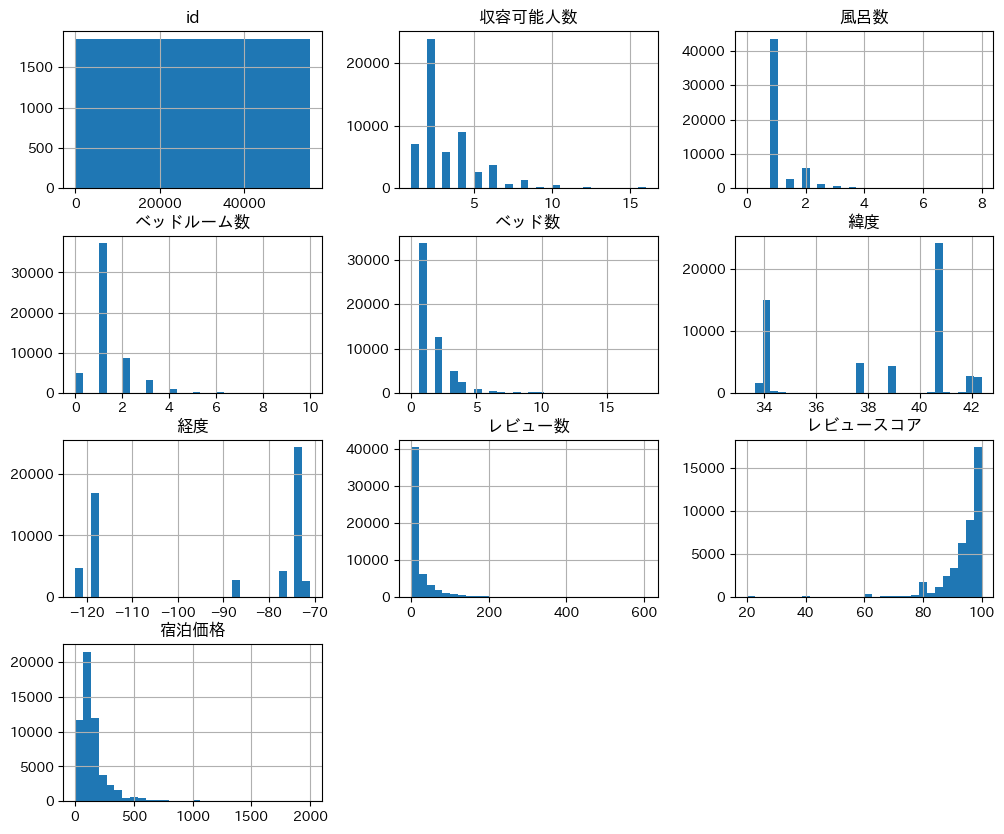

In [ ]:
# 数値列のヒストグラム（度数分布図）を描画
df.hist(bins=30, figsize=(12,10))

・宿泊価格の分布は正規分布ではない。
宿泊価格のヒストグラムは、低価格帯に偏っている。
一部の宿泊施設は非常に高価格である。






・宿泊価格に関して、ヒストグラムでは大きい値の分布を把握しづらいため、箱ひげ図を作成する。

{'whiskers': [<matplotlib.lines.Line2D at 0x7c12a68fdd90>,
 'caps': [<matplotlib.lines.Line2D at 0x7c12a68ff050>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c12a68f6f50>],
 'medians': [<matplotlib.lines.Line2D at 0x7c12a6710490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c12a6710c90>],
 'means': []}

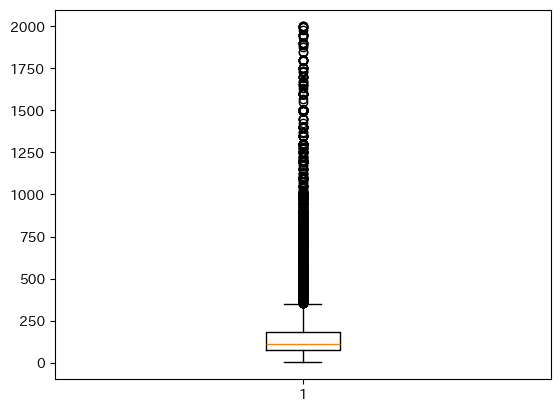

In [ ]:
# '宿泊価格' 列の 箱ひげ図 を作成
import matplotlib.pyplot as plt

plt.boxplot(df['宿泊価格'])

箱ひげ図より、外れ値があることが確認できたが、 数が多いことが分かる。とりあえず、このまま分析を進める。

## ３． データの前処理

### 目的変数の対数変換

回帰の場合、目的変数の値が正規分布に従っていることが重要だが、現状の目的変数の値（宿泊価格）は正規分布からは程遠いため対数変換をする。

In [ ]:
# 宿泊価格Log列をdfに追加
df['宿泊価格Log'] = np.log(df['宿泊価格'])

# dfを確認。
df.head()

,id,収容可能人数,アメニティ,風呂数,ベッドの種類,ベッドルーム数,ベッド数,キャンセルポリシー,都市,クリーニング料金を含むか,...,物件名,近隣情報,レビュー数,物件の種類,レビュースコア,部屋の種類,サムネイル画像リンク,郵便番号,宿泊価格,宿泊価格Log
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0,4.927254
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0,3.737670
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0,4.174387
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0,5.111988
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0,5.105945


<ipython-input-17-4105602162>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['宿泊価格Log'])


<Axes: xlabel='宿泊価格Log', ylabel='Density'>

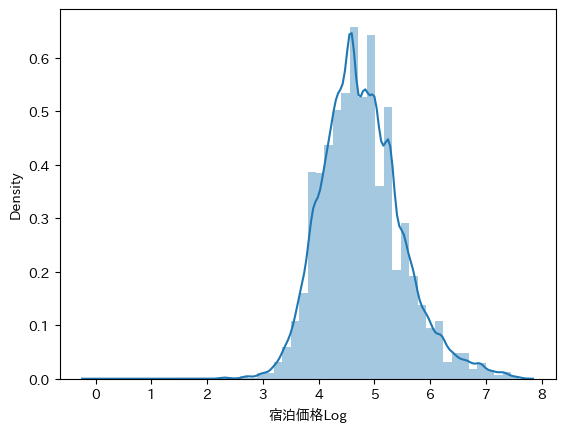

In [ ]:
# '宿泊価格Log' 列の分布を可視化
sns.distplot(df['宿泊価格Log'])

宿泊価格を対数変換した結果、正規分布に近づいたことがわかる。

目的変数は**宿泊価格Log**とする。

### 数値データに焦点を当ててモデル構築を進めるため、文字列のデータを削除

In [ ]:
# 文字列objectを削除し df_num という変数にいれる
df_num = df.drop(columns=['アメニティ', 'ベッドの種類', 'キャンセルポリシー', '都市', 'クリーニング料金を含むか','説明', '最初のレビュー日', 'ホストの写真があるかどうか', 'ホストの身元確認が取れているか', 'ホストの返信率', 'ホストの登録日','即時予約可能か','最後のレビュー日','物件名','近隣情報','物件の種類','部屋の種類','サムネイル画像リンク','郵便番号'])

# df_numを表示
df_num

,id,収容可能人数,風呂数,ベッドルーム数,ベッド数,緯度,経度,レビュー数,レビュースコア,宿泊価格,宿泊価格Log
0,0,6,2.0,1.0,4.0,33.788931,-118.154761,1,60.0,138.0,4.927254
1,1,2,1.0,1.0,1.0,38.934810,-76.978190,9,100.0,42.0,3.737670
2,2,2,2.0,1.0,1.0,40.695118,-73.926240,27,83.0,65.0,4.174387
3,3,2,1.0,1.0,1.0,37.796728,-122.411906,38,95.0,166.0,5.111988
4,4,2,1.0,1.0,1.0,40.785050,-73.974691,5,100.0,165.0,5.105945
...,...,...,...,...,...,...,...,...,...,...,...
55578,55578,4,1.5,1.0,1.0,40.739261,-73.994814,110,93.0,340.0,5.828946
55579,55579,2,1.0,1.0,1.0,41.933710,-87.720810,6,87.0,30.0,3.401197
55580,55580,2,1.0,1.0,1.0,37.762222,-122.416493,14,99.0,100.0,4.605170
55581,55581,1,1.5,1.0,1.0,34.217543,-118.534260,10,100.0,38.0,3.637586


In [ ]:
# df_num データを確認し、すべての列が数値になっていることを確認
df_num.dtypes

,0
id,int64
収容可能人数,int64
風呂数,float64
ベッドルーム数,float64
ベッド数,float64
緯度,float64
経度,float64
レビュー数,int64
レビュースコア,float64
宿泊価格,float64


### 前処理済データの保存

前処理済のデータをCSVファイルとして保管。

In [ ]:
# データフレーム df_num の内容を 'train_md.csv' という名前のCSVファイルに保存。
df_num.to_csv('train_md.csv')

## ４． モデル構築と学習

### 説明変数Xと目的変数yに分割

In [ ]:
# dfコピー作成
df = df_num.copy()

In [ ]:
X = df.drop(columns=['宿泊価格','宿泊価格Log']).to_numpy()
y = df['宿泊価格Log'].to_numpy()

### Xとyを訓練用データとテスト用データに分割

In [ ]:
# 機械学習ライブラリscikit-learn（sklearn）からtrain_test_splitをインポート
from sklearn.model_selection import train_test_split

In [ ]:
# X（特徴量データ）とy（ラベルデータ）を訓練用データ（X_train, y_train）とテスト用データ（X_test, y_test）に分割する。
# train.csv から 訓練用データ（X_train, y_train）とテスト用データ（X_test, y_test）を作成する。
# 30％をテストデータとする。同じシードを使用する。
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# 訓練用データおよびテスト用データの形状（shape）を表示。
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(38908, 9) (16675, 9) (38908,) (16675,)


### LinearRegression (線形回帰モデル) 作成と学習

In [ ]:
# 機械学習ライブラリscikit-learn（sklearn）からLinearRegressionクラスをインポート
# from sklearn.linear_model import LinearRegression

In [ ]:
# インポートしたLinearRegressionクラスをインスタンス化して、modelという変数に代入
# model = LinearRegression()

In [ ]:
# 線形回帰modelを訓練する処理を行う。訓練データX_trainとその対応するラベルy_trainを使って、モデルを学習させる。
# model.fit(X_train, y_train)

上述のコードを実行したが、学習させるデータに欠損値（NaN）が含まれており、線形回帰モデルは欠損値を含むデータを扱えないためエラーが発生した。

解決策としては、以下の2つが考えられる。

1.欠損値をそのまま扱える別のモデル（HistGradientBoostingClassifier、HistGradientBoostingRegressorなど）を使用する。


2.データを前処理する。例えば、欠損値を補完する（imputerを使用する）か、欠損値を含むサンプルを削除する。

今回は1の欠損値をそのまま扱える別のモデル（HistGradientBoostingRegressor）を使用することにする。

### HistGradientBoostingRegressor（勾配ブースティングという手法を用いた回帰モデル）作成と学習

In [ ]:
# 機械学習ライブラリであるscikit-learnから、HistGradientBoostingRegressor クラスをインポート
from sklearn.ensemble import HistGradientBoostingRegressor

# モデルの学習
model_HGBR = HistGradientBoostingRegressor(random_state=42)
model_HGBR.fit(X_train, y_train)

# 予測
y_pred_HGBR = model_HGBR.predict(X_test)



## ５．モデル評価

### 予測精度をＲＭＳＥで評価

In [ ]:
# インストール済みの scikit-learn ライブラリを最新バージョンにアップグレード
!pip install --upgrade scikit-learn

In [ ]:
# sklearn.metricsモジュールから特定のmean_squared_error関数をインポート。
from sklearn.metrics import mean_squared_error,root_mean_squared_error

# y_test を元のスケールに戻す
y_test_original = np.exp(y_test)

# 予測値を元のスケールに戻す
y_pred_original = np.exp(y_pred_HGBR)

# RMSE を計算
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))

# RMSE を出力
print(f'Original scale RMSE: {rmse_original}')


Original scale RMSE: 116.68475290288717


テストデータの予測精度はRMSEで116.68

In [ ]:
# 学習データの予測値を計算
y_train_pred_HGBR = model_HGBR.predict(X_train)

# y_train を元のスケールに戻す
y_train_original = np.exp(y_train)

# 予測値を元のスケールに戻す
y_train_pred_original = np.exp(y_train_pred_HGBR)

# RMSE を計算
rmse_train_original = np.sqrt(mean_squared_error(y_train_original, y_train_pred_original))

# RMSE を出力
print(f'Original scale RMSE (train): {rmse_train_original}')

Original scale RMSE (train): 109.52705196946188


学習データの予測精度はRMSEで109.53

したがって、過学習はしていないと判断する。

## ６．評価用データで予測、評価

In [ ]:
# SIGNATEの評価用データを読み込む
df_test = pd.read_csv('/content/test.csv')

In [ ]:
# デフォルトで先頭5行を表示
df_test.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,...,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,...,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,...,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,...,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,...,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [ ]:
# 日本語の列名にする
# 最初の5行を表示
feature_names_JPN_test = ['id','収容可能人数','アメニティ','風呂数','ベッドの種類','ベッドルーム数','ベッド数','キャンセルポリシー','都市','クリーニング料金を含むか','説明','最初のレビュー日','ホストの写真があるかどうか','ホストの身元確認が取れているか','ホストの返信率','ホストの登録日','即時予約可能か','最後のレビュー日','緯度','経度','物件名','近隣情報','レビュー数','物件の種類','レビュースコア','部屋の種類','サムネイル画像リンク','郵便番号']
df_test.columns = feature_names_JPN_test
df_test.head()

,id,収容可能人数,アメニティ,風呂数,ベッドの種類,ベッドルーム数,ベッド数,キャンセルポリシー,都市,クリーニング料金を含むか,...,緯度,経度,物件名,近隣情報,レビュー数,物件の種類,レビュースコア,部屋の種類,サムネイル画像リンク,郵便番号
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,...,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,...,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,...,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,...,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,...,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [ ]:
# 文字列objectを削除し df_num という変数にいれる
df_test_num = df_test.drop(columns=['アメニティ', 'ベッドの種類', 'キャンセルポリシー', '都市', 'クリーニング料金を含むか','説明', '最初のレビュー日', 'ホストの写真があるかどうか', 'ホストの身元確認が取れているか', 'ホストの返信率', 'ホストの登録日','即時予約可能か','最後のレビュー日','物件名','近隣情報','物件の種類','部屋の種類','サムネイル画像リンク','郵便番号'])

# df_numを表示
df_test_num

,id,収容可能人数,風呂数,ベッドルーム数,ベッド数,緯度,経度,レビュー数,レビュースコア
0,0,6,2.0,2.0,2.0,42.359278,-71.069962,58,90.0
1,1,3,1.0,1.0,1.0,34.084747,-118.367355,4,100.0
2,2,2,1.0,0.0,1.0,40.720541,-73.959192,0,NaN
3,3,4,1.0,1.0,2.0,40.681117,-73.944091,0,NaN
4,4,3,1.5,1.0,2.0,34.150995,-118.409359,6,92.0
...,...,...,...,...,...,...,...,...,...
18523,18523,4,1.0,2.0,2.0,40.734555,-73.954892,0,NaN
18524,18524,2,1.0,2.0,1.0,41.945939,-87.672018,9,90.0
18525,18525,5,1.5,2.0,2.0,41.933123,-87.708087,0,NaN
18526,18526,2,1.0,1.0,2.0,40.788702,-73.947358,4,95.0


In [ ]:
# df_test_num を NumPy 配列に変換し、X_test_test という変数に格納
X_test_test = df_test_num.to_numpy()

In [ ]:
# 評価データで予測
pred = model_HGBR.predict(X_test_test)

In [ ]:
# 予測値
pred

array([5.52299157, 4.85218275, 4.90434163, ..., 5.02089027, 4.63975115,
       4.13441764])

In [ ]:
#予測値を元のスケールに戻す
pred_original = np.exp(pred)

In [ ]:
pred_original

array([250.38295633, 128.01951928, 134.87408306, ..., 151.54616026,
       103.5185837 ,  62.45320994])

In [ ]:
# 提出用ファイルを読み込み、sample という変数に格納
sample = pd.read_csv("sample_submit.csv", header=None)

In [ ]:
# sampleの2列目に予測値predを代入
# 先頭 5 行を表示
sample[1] = pred_original
sample.head()

,0,1
0,0,250.382956
1,1,128.019519
2,2,134.874083
3,3,126.135619
4,4,85.798210


In [ ]:
# 結果をcsvデータに保存
sample.to_csv("submit.csv",index=None,header=None)


SIGNATEにてスコアが2500人中600位となる。

## ７．ハイパーパラメータをチューニング

精度を上げるために、モデルのハイパーパラメーターのチューニングを試みた。

In [ ]:
#モデルのハイパーパラメーターをチューニングするために、
#グリッドサーチ(GridSearchCV)をインポートする。
#（ここでCVは、Cross Validation(交差検証)を意味）
from sklearn.model_selection import GridSearchCV
model_HGBR2 = HistGradientBoostingRegressor(random_state=42)

#max_depthを以下の3つで試す
max_depth = [2, 8, 32]
params = {'max_depth':max_depth}

GridSearchCV()は、回帰ではデフォルトのスコアが決定係数Rなので、引数にscoring='neg_mean_squared_error'を追加してRMSEをスコアに指定する。

In [ ]:
#グリッドサーチで，上記ハイパーパラメータ組み合わせの5通りを試す。
#入力したデータを更に5分割(cv=5)し，その内4つを訓練用データに，1つを評価用データにして、
#モデルを構築し，精度を出力することを5回繰り返す。
#5回のスコアの平均値を，モデルのスコアとする（層化5分割交差検証）。
grid_cv = GridSearchCV(estimator=model_HGBR2, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_cv.fit(X_train, y_train)



,estimator,HistGradientB...ndom_state=42)
,param_grid,"{'max_depth': [2, 8, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [ ]:
#GridSearchCV によるハイパーパラメータチューニングの結果、最も性能が良かったモデルのインスタンスを返す。
grid_cv.best_estimator_

,loss,'squared_error'
,quantile,None
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,31
,max_depth,8
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'


In [ ]:
#GridSearchCV によるハイパーパラメータチューニングの結果、
#最も性能が良かったハイパーパラメータの組み合わせを辞書形式で返す。
grid_cv.best_params_

{'max_depth': 8}

GridSearchの結果、ベストなmax_depth=8であることが分かった。

### RMSEの計算

In [ ]:
# grid_cv はすでに学習済みの GridSearchCV オブジェクトと仮定
best_model_2 = grid_cv.best_estimator_

# X_train で予測
y_pred_log_2 = best_model_2.predict(X_train)

# 予測値を元のスケールに戻す
y_pred = np.exp(y_pred_log_2)

# 元のスケールの y_train でRMSEを計算
rmse_2 = np.sqrt(mean_squared_error(np.exp(y_train), y_pred))

print(f'元のスケールでの train best RMSE スコア : {rmse_2}')

元のスケールでの train best RMSE スコア : 108.94737281645186


In [ ]:
# 予測
# グリッドサーチの結果のモデルgrid_cvを使用する。
model_HGBR=grid_cv
y_pred_HGBR = model_HGBR.predict(X_test)

In [ ]:
# テストデータの予測精度
from sklearn.metrics import mean_squared_error,root_mean_squared_error
rmse_hgbr = root_mean_squared_error(np.exp(y_test), np.exp(y_pred_HGBR))
print(f"RMSE: {rmse_hgbr}")

RMSE: 116.84638466470108


テストデータの予測精度はRMSEで116.85

In [ ]:
# 学習データの予測精度
y_train_pred_HGBR = model_HGBR.predict(X_train)
rmse_hgbr_train = root_mean_squared_error(np.exp(y_train), np.exp(y_train_pred_HGBR))
print(f"RMSE: {rmse_hgbr_train}")

RMSE: 108.94737281645186


学習データの予測精度はRMSEで108.95

グリッドサーチの結果、ハイパーパラメータ―max_depth=8に調整した。

## ８．課題

（１）現状では数値データのみを使用しているため、物件名、説明、アメニティなどのテキストデータに含まれる情報を活用することで、予測精度を向上させる可能性がある。自然言語処理技術を用いた特徴量エンジニアリングが有効と考えられる。

（２）より広範なハイパーパラメータの探索や、より適切な評価指標を用いたチューニングによって、モデルの性能をさらに最適化できる可能性がある。今回のハイパーパラメータ調整はmax_depth１つしか行わなかったため、スコア改善にはつながらなかった。今後、他のハイパーパラメータ調整をし、スコア改善につなげたい。


（３）宿泊価格など、一部の特徴量に外れ値が存在することが確認されている。外れ値の影響を軽減するための処理を検討することで、モデルの安定性と精度を向上させることが期待される。

## ９．まとめ

　Airbnbのリスティングデータから宿泊価格を予測するために、HistGradientBoostingRegressorモデルを用いた回帰分析を行った。宿泊価格を対数変換することで正規分布に近づけ、モデルの精度向上に寄与した。
数値データのみを用いたシンプルなモデルでも、一定の予測精度（テストデータのRMSE：約116）を達成できた。さらに、上述の課題について取り組むことが、モデルの予測性能を向上させる上で重要であると言える。
